In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


LOADING DATASET

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


DISPLAYING FEW SAMPLES OF DATASET


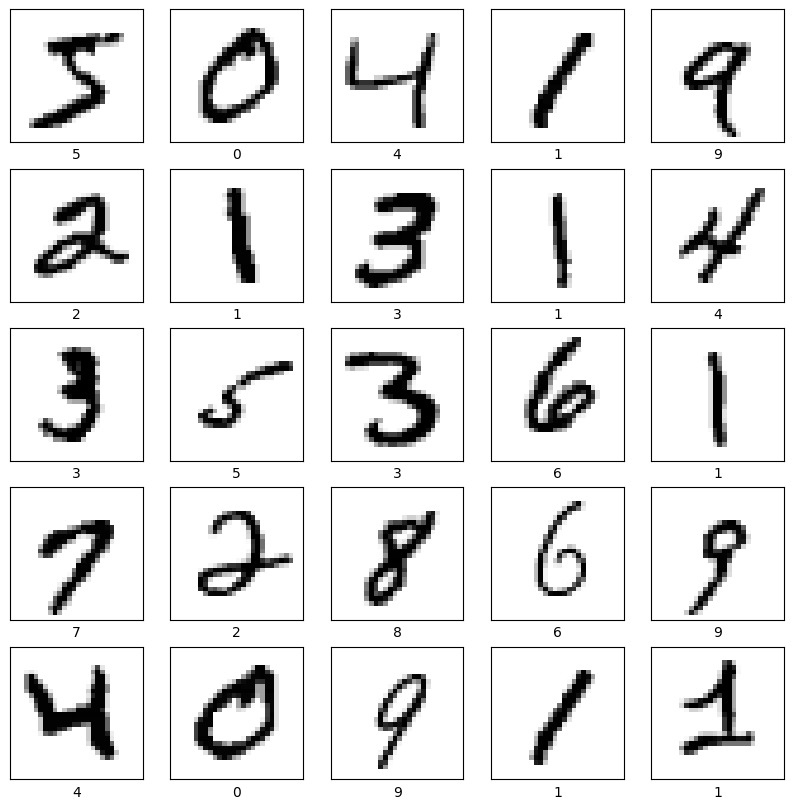

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(str(train_labels[i]))
plt.show()

PERFORMING EDA 

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10


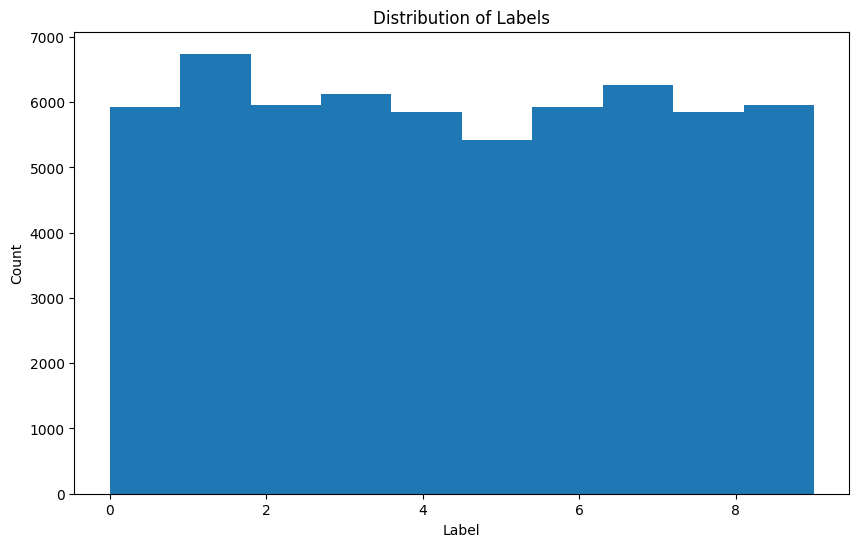

In [9]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

num_classes = len(np.unique(train_labels))
print("Number of classes:", num_classes)

plt.figure(figsize=(10, 6))
plt.hist(train_labels, bins=num_classes)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()


PREPROCESS THE DATASET

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

CREATING THE MODEL (A SIMPLE CONVOLUTIONAL NEURAL NETWORK)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])


COMPILE THE MODEL

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

TRAINING THE MODEL

In [14]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1113 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9756
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0585 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0196 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.01

EVALUATE THE MODEL

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9766
Test accuracy: 0.9765999913215637
